#### This is for the exercises for boosting related algorithm

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, mean_absolute_error

# classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [28]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=8,
                          n_redundant=3, n_repeated=2, random_state=111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 111)

#### single tree

In [29]:
decision_tree = DecisionTreeClassifier(random_state=111)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred_prob = decision_tree.predict_proba(X_test)

# evaluation
decision_tree_accuracy = accuracy_score(y_pred, y_test)
decision_tree_log_loss = log_loss(y_test, y_pred)

print("==Decision Tree==")
print("Accuracy: {0:.2f}".format(decision_tree_accuracy))
print("Log loss: {0:.2f}".format(decision_tree_log_loss))
print("Number of nodes created: {}".format(decision_tree.tree_.node_count))

# view more details
print("True labels:", y_test[:15,])
print("Pred labels:", y_pred[:15,])
print("Pred_Probility\n", y_pred_prob[:5,])

==Decision Tree==
Accuracy: 0.81
Log loss: 6.39
Number of nodes created: 151
True labels: [1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
Pred labels: [1 0 0 0 1 1 1 0 0 1 0 0 0 1 1]
Pred_Probility
 [[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


#### Visualize the tree
the tree is quite big and bushy

In [62]:
from IPython.display import Image
import subprocess

dt_viz_file = "dt.dot"
dt_png_file = "dt.png"

# create visualization
export_graphviz(decision_tree, out_file=dt_viz_file)

# convert to PNG: if you get exit 1 error, it is because the 'dot' executable is
# not available. Need to install GraphViz package will fix the problem
command = ['dot', dt_viz_file, '-Tpng', '-o', dt_png_file]
subprocess.check_call(command, shell=True)

# the above not working, here I will try pydot
#import pydot
#(png, ) = pydot.graph_from_dot_file(dt_viz_file)
#png.write_png(dt_png_file)

# Display
Image(filename=dt_png_file)

#### AdaBoost
we are growing decision node up to the first split (which is called _decision stumps_)

In [31]:
adaboost = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        algorithm='SAMME',
        n_estimators=1000,
        random_state=123)

# train classifier and make prediction
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
y_pred_prob = adaboost.predict_proba(X_test)

# evaluation
accuracy = accuracy_score(y_pred, y_test)
logloss = log_loss(y_test, y_pred_prob)

print("Adaboost accuracy: {0:.2f}".format(accuracy))
print("Adaboost log loss: {0:.2f}".format(logloss))

# view details
print("y_test label: ", y_test[:15,])
print("y_pred label: ", y_pred[:15,])
print("y prediction probability: \n", y_pred_prob[:5,])

Adaboost accuracy: 0.89
Adaboost log loss: 0.68
y_test label:  [1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
y_pred label:  [1 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
y prediction probability: 
 [[ 0.48923518  0.51076482]
 [ 0.49770373  0.50229627]
 [ 0.4965521   0.5034479 ]
 [ 0.49935837  0.50064163]
 [ 0.48928839  0.51071161]]


let's check what the first tree looks like and find out its contribution to the final ensemble

In [32]:
ada_t1 = adaboost.estimators_[0]
ada_t1_viz_file = 'ada_t1.dot'
ada_t1_png_file = 'ada_t1.png'

# create visualization
export_graphviz(ada_t1, out_file=ada_t1_viz_file)

# convert to PNG
command = ['dot', '-Tpng', ada_t1_viz_file, '-o', ada_t1_png_file]
subprocess.check_call(command, shell=True)

# viewing
Image(ada_t1_png_file)

In [33]:
# print first estimator's error
print("Error: {0:.2f}".format(adaboost.estimator_errors_[0]))
print("Tree important: {0:.2f}".format(adaboost.estimator_weights_[0]))

Error: 0.27
Tree important: 1.01


#### Gradient Boosted Tree (GBT)
let's construct a GBT consisting 1000 trees where each successive one will be created with gradient optimization. We will leave most parameters with their default values, specify the max_depth of the tree to 1, and setting warm start for more intelligent computation. 

In [34]:
gbt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                 warm_start=True, random_state=123)
gbt.fit(X_train, y_train)
gbt_y_pred = gbt.predict(X_test)
gbt_y_pred_prob = gbt.predict_proba(X_test)

# evaluation
accuracy = accuracy_score(y_test, gbt_y_pred)
logloss = log_loss(y_test, gbt_y_pred_prob)
# log_loss = log_loss(y_test, gbt_y_pred_prob)  ===> bad
# note, try not to use the same name for both variable and function. otherwise,
# it will give you TypeError: 'numpy.float64' object is not callable

print("Accuracy: {0:.2f}".format(accuracy))
print("log loss: {0:.2f}".format(logloss))

# view the first several instances
print("y labels:    ", y_test[:15,])
print("y predicted: ", gbt_y_pred[:15,])
print("y predicted probability:\n", gbt_y_pred_prob[:5,])

Accuracy: 0.90
log loss: 0.24
y labels:     [1 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
y predicted:  [1 0 0 0 1 0 1 0 0 1 0 0 0 1 0]
y predicted probability:
 [[ 0.0125176   0.9874824 ]
 [ 0.84405924  0.15594076]
 [ 0.77342065  0.22657935]
 [ 0.96954721  0.03045279]
 [ 0.27227844  0.72772156]]


Here GBT actually use DecisionTreeRegressor classifier as the estimator with *mean_square_error* as criterion. This results a slight different tree. The leaf will contain the predicted value, while the previous ones split points

In [35]:
gbt_t1 = gbt.estimators_[2][0]
gbt_dt_dot = 'gbt.dot'
gbt_dt_pnd = 'gbt.png'

# exporting dot file
export_graphviz(gbt_t1, out_file=gbt_dt_dot)

# conversion
command = ['dot', '-Tpng', gbt_dt_dot, '-o', gbt_dt_pnd]
subprocess.check_call(command, shell=True)

Image(gbt_dt_pnd)

### XGBoost
- ***XGBoost handles only numeric variables***
- the dataset used is Agaricus (mushroom classification). All of them has been preprocessed and categorical data have been encoded. Data have been divided into training and test sets
- The target is 0 and 1 for edible and poisonous. So it is a binary classification!
#### details about xgboost
- data need to be stored in _DMatrix_ object, which is designed to handle sparse dataset. It can be populated in the following ways:
  - use libsvm format text file
  - use Numpy 2D array (most popular one)
  - use XGBoost binary buffer file
- here I use the first option! that is using libsvm
  - libsvm only stores non-zero elements in format
  - <label> <feature_a>:<value_a><feature_c>:<value_c>...<feature_x>:<value_x>
  - any missing features indicate that its corresponding value is 0

In [46]:
import xgboost as xgb

# load data
dtrain = xgb.DMatrix('data/agaricus.txt.train')
dtest  = xgb.DMatrix('data/agaricus.txt.test')

# view
print("training data contain {0} rows and {1} columns.".format(dtrain.num_row(), dtrain.num_col()))
print("test data contain {0} rows and {1} columns.".format(dtest.num_row(), dtest.num_col()))

# view the unique labels (or targets)
print("training possible labels:")
print(np.unique(dtrain.get_label()))

print("test possible labels:")
print(np.unique(dtest.get_label()))

training data contain 6513 rows and 126 columns.
test data contain 1611 rows and 126 columns.
training possible labels:
[ 0.  1.]
test possible labels:
[ 0.  1.]


#### Specify training parameters
- this is one of important things I need to adjust. But here we need to make some assumptions
  - we are dealing with binary classification problem ('objective':'binary:logistic')
  - we want shallow single trees with no more than 2 levels ('max_depth':2)
  - we don't produce any output ('silent':1)
  - we want to iterate 5 rounds
- we could also observe the performance on both test and training dataset using watch_list

In [47]:
# setting parameters
params = { 'objective':'binary:logistic',
           'max_depth':2,
           'silent':1,
           'eta':1}

num_rounds = 5

# do training
#dt = xgb.train(params, dtrain, num_rounds)

# you could add a watchlist to the training
watch_list = [(dtest,'test'), (dtrain,'train')]    # native interface only
dtt = xgb.train(params, dtrain, num_rounds, watch_list)

# prediction
pred_prob = dtt.predict(dtest)
print(pred_prob[:5])

[0]	test-error:0.042831	train-error:0.046522
[1]	test-error:0.021726	train-error:0.022263
[2]	test-error:0.006207	train-error:0.007063
[3]	test-error:0.018001	train-error:0.0152
[4]	test-error:0.006207	train-error:0.007063
[ 0.08073306  0.92217326  0.08073306  0.08073306  0.05050367]


#### XGBoost validation
calculate the accuracy to verify the results. Of course, validation should be performed accordingly to the dataset. In our case, the accuracy is sufficient

In [48]:
labels = dtest.get_label()
preds = pred_prob > 0.5  # threshold
correct = 0

for i in range(len(preds)):
    if labels[i] == preds[i]:
        correct += 1
        
print("predicted accuracy is {0}/{1}: ".format(correct, len(preds)))
print("Error is: {0:.4f}".format(1 - correct/len(preds)))


predicted accuracy is 1601/1611: 
Error is: 0.0062


### Evaluation which feature is most important
- Before moving on, it's important to understand the intuition about how trees are grown.

  - while building a tree is divided recursively several times (in this example only once) - this operation is called split. To perform a split, the algorithm must figure out which is the best (one) feature to use.
  - After that, at the bottom of the tree, we get groups of observations packed in the leaves
  - in the final model, these leafs are supposed to be as pure as possible for each tree, meaning in our case that each leaf should be made of one label class.
  - Not all splits are equally important. Basically the first split of a tree will have more impact on the purity than, for instance, the deepest split. intuitively, we understand that the first split makes most of the work, and the following splits focus on smaller parts of the dataset which have been mis-classified by the first tree.
  - In the same way, in Boosting we try to optimize the mis-classification at each round (it is called the loss). So the first tree will do the big work and the following trees will focus on the remaining, on the parts not correctly learned by the previous trees.
  - The improvement bought by each split can be measured, it is the gain. 
  - ~Quated from the Kaggle Tianqi Chen's Kaggle noteboo.

Let's investigate how trees look like in our case:

In [50]:
import seaborn as sns

sns.set(font_scale=1.5)

tree_dump = dtt.get_dump(fmap='data/featmap.txt', with_stats=True)

for tree in tree_dump:
    print(tree)


0:[f28<-9.53674e-07] yes=1,no=2,missing=1,gain=4000.53,cover=1628.25
	1:[f55<-9.53674e-07] yes=3,no=4,missing=3,gain=1158.21,cover=924.5
		3:leaf=1.71218,cover=812
		4:leaf=-1.70044,cover=112.5
	2:[f108<-9.53674e-07] yes=5,no=6,missing=5,gain=198.174,cover=703.75
		5:leaf=-1.94071,cover=690.5
		6:leaf=1.85965,cover=13.25

0:[f59<-9.53674e-07] yes=1,no=2,missing=1,gain=832.545,cover=788.852
	1:[f28<-9.53674e-07] yes=3,no=4,missing=3,gain=569.725,cover=768.39
		3:leaf=0.784718,cover=458.937
		4:leaf=-0.96853,cover=309.453
	2:leaf=-6.23624,cover=20.4624

0:[f101<-9.53674e-07] yes=1,no=2,missing=1,gain=368.745,cover=457.069
	1:[f66<-9.53674e-07] yes=3,no=4,missing=3,gain=226.337,cover=221.051
		3:leaf=0.658725,cover=212.999
		4:leaf=5.77229,cover=8.05201
	2:[f110<-9.53674e-07] yes=5,no=6,missing=5,gain=258.184,cover=236.018
		5:leaf=-0.791407,cover=233.488
		6:leaf=-9.42142,cover=2.53039

0:[f26<-9.53674e-07] yes=1,no=2,missing=1,gain=140.486,cover=364.119
	1:[f38<-9.53674e-07] yes=3,no=4,

#### For each split we are getting the following details:
- which feature was used to make split,
- possible choices to make (branches)
- ***gain*** which is the actual improvement in accuracy brought by that feature. The idea is that before adding a new split on a feature X to the branch, there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate (one branch saying if your obsration is on this branch, then it should be classified as 1, and the other branch saying the exact opposite),
- ***cover*** measures the relative quantity of observations concerned by that feature

### Plotting
Hopefully there are better ways to figure out which features really mater. We can use built-in function plot_importance that will create a plot presenting most important features due to some criterias. We will analyze the impact of each feature for all splits and all trees and visualize results.
See which feature provided the most gain:

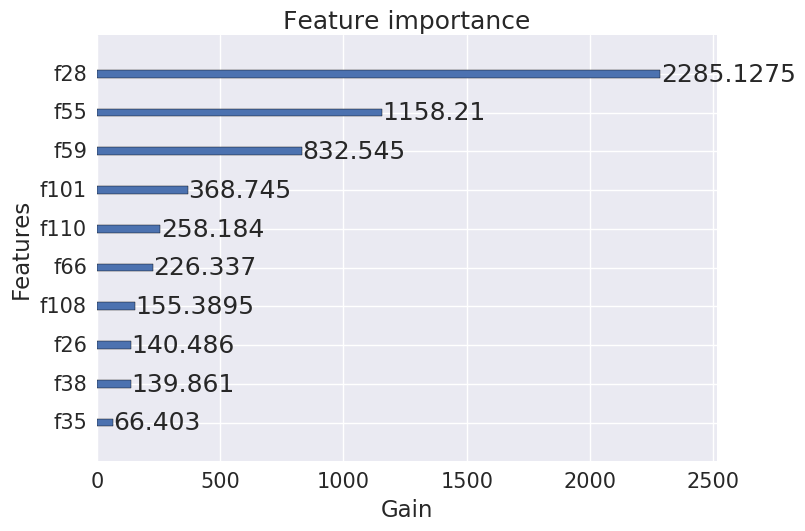

In [51]:
xgb.plot_importance(dtt, importance_type='gain', xlabel='Gain')

#### F-score metric
We can simplify it a little bit by introducing a F-score metric

***F-score***: sums up how many times a split was performed on each feature

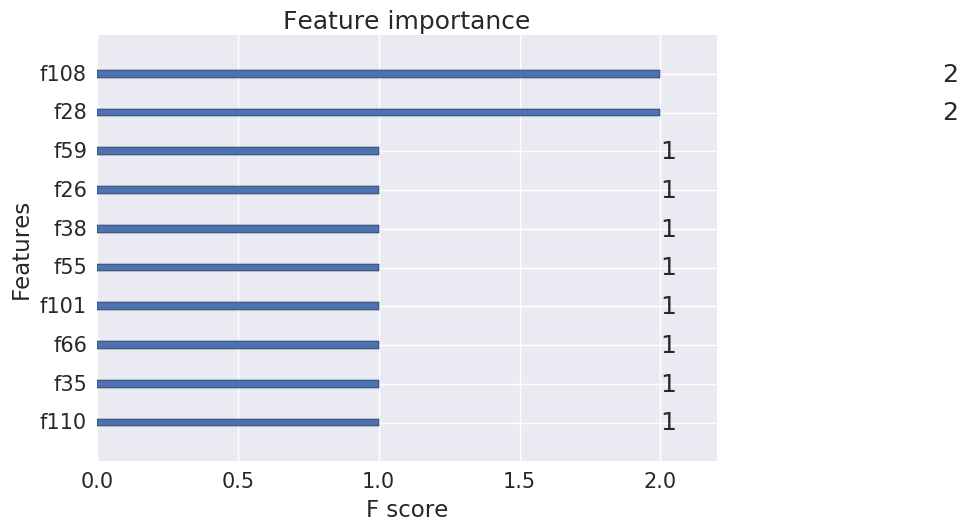

In [52]:
xgb.plot_importance(dtt)

In case you want to visualize it another way, a created model enables convinient way of accessing the f-score

In [53]:
importances = dtt.get_fscore()
importances

{'f101': 1,
 'f108': 2,
 'f110': 1,
 'f26': 1,
 'f28': 2,
 'f35': 1,
 'f38': 1,
 'f55': 1,
 'f59': 1,
 'f66': 1}

Now we can manipulate data in our own way

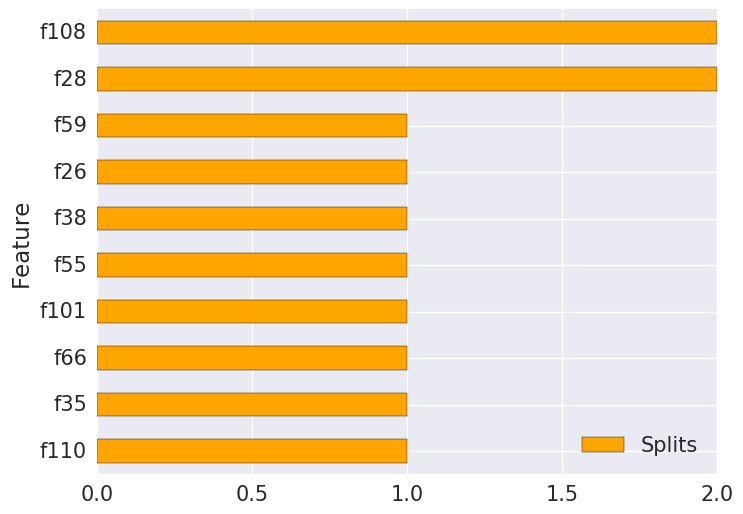

In [55]:
# create df
importance_df = pd.DataFrame({'Splits' : list(importances.values()), 
                              'Feature' : list(importances.keys())})

importance_df.sort_values(by='Splits', inplace=True)
importance_df.plot(kind='barh', x='Feature', figsize=(8,6), color='orange')


### sklearn XGBClassifier
- An alternative way is to use sci-kit learn's XGBClassifier(). Most part are the same 

In [43]:
from sklearn.datasets import load_svmlight_files
from xgboost.sklearn import XGBClassifier

# the split order is different from the traditional ones
X_train, y_train, X_test, y_test = load_svmlight_files(('data/agaricus.txt.train', 'data/agaricus.txt.test'))
print("Training dataset contains {0} rows and {1} columns".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset contains {0} rows and {1} columns".format(X_test.shape[0], X_test.shape[1]))

print("Train possible labels:")
print(np.unique(y_train))

print("Test possible labels:")
print(np.unique(y_test))

Training dataset contains 6513 rows and 126 columns
Test dataset contains 1611 rows and 126 columns
Train possible labels:
[ 0.  1.]
Test possible labels:
[ 0.  1.]


#### Training and testing
- need to provide parameters for XGBoost

In [45]:
params = { 'objective':'binary:logistic',
           'max_depth':2,
           'silent':1,
           'learning_rate':1.0,   # we want the algorithm to learn fast and aggressively. Named 'eta' in the native program
           'n_estimators':5}

clf = XGBClassifier(**params)
dt = clf.fit(X_train, y_train)

pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)
print(pred)

correct = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        correct += 1
        
print("The correct predictions are: {0}/{1}".format(correct, len(pred)))
print("Errors: {0:.4f}".format(1-acc))

[ 0.  1.  0. ...,  1.  0.  1.]
The correct predictions are: 1601/1611
Errors: 0.0062
